In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [3]:
def topk_accuracy(preds, targets, k):
    _, topk = preds[0].topk(k,1,True,True)    
    correct = 0
    
    for i in range(k):
        correct += sum(targets == topk[:,i:i+1])
    
    accu = correct.double() / topk.size(0)
    
    return accu.tolist()[0]

In [4]:
#path_img = Path('./dataset_20_images/train')
path_img = Path('./dataset_20_images/train/')

In [5]:
path_img.ls()

['shila_amzah',
 'fasha_sandha',
 'hanna_delisha',
 'siti_nurhaliza',
 'nur_fazura',
 'lisa_surihani',
 'sharifah_sakinah',
 'fatiya_latiff',
 'samantha_lee',
 'zara_zya',
 'syamtilla_melvin',
 'siti_sarah',
 'yumi_wong',
 'diana_danielle',
 'erin_malek',
 'erra_fazira',
 'zizan_razak',
 'zul_ariffin',
 'neelofa',
 'yana_samsudin',
 'anzalna_nasir',
 'nabila_razali',
 'dato_seri_vida',
 'aeril_zafrel',
 'ayda_jebat',
 'emma_maembong',
 'zulin_aziz',
 'mia_ahmad',
 'nelydia_senrose',
 'alif_satar',
 'hairul_azreen',
 'ajak_shiro',
 'nabila_huda',
 'khai_bahar',
 'fattah_amin',
 'aiman_hakim',
 'siti_nordiana',
 'ummi_nazeera',
 'scha_alyahya',
 'siti_saleha',
 'nora_danish',
 'models',
 'tiz_zaqyah',
 'vivy_yusof',
 'awal_ashaari',
 'janna_nick']

In [6]:
fnames = []
for i in path_img.ls():
    fnames += get_image_files(path_img/i)

np.random.seed(2)
pat = r'/train/(.*)/'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299,valid_pct=0.2)
data.normalize(imagenet_stats)

data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=299)
data.normalize(imagenet_stats)

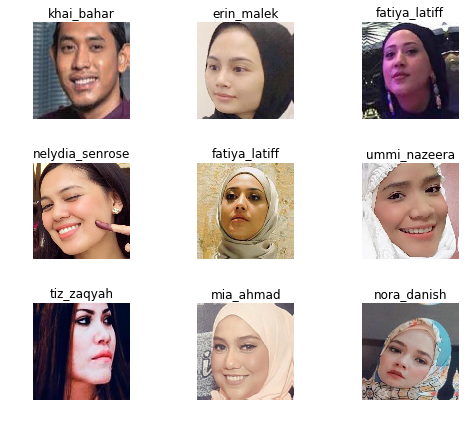

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes),data.c

['shila_amzah', 'fasha_sandha', 'hanna_delisha', 'siti_nurhaliza', 'nur_fazura', 'lisa_surihani', 'sharifah_sakinah', 'fatiya_latiff', 'samantha_lee', 'zara_zya', 'syamtilla_melvin', 'siti_sarah', 'yumi_wong', 'diana_danielle', 'erin_malek', 'erra_fazira', 'zizan_razak', 'zul_ariffin', 'neelofa', 'yana_samsudin', 'anzalna_nasir', 'nabila_razali', 'dato_seri_vida', 'aeril_zafrel', 'ayda_jebat', 'emma_maembong', 'zulin_aziz', 'mia_ahmad', 'nelydia_senrose', 'alif_satar', 'hairul_azreen', 'ajak_shiro', 'nabila_huda', 'khai_bahar', 'fattah_amin', 'aiman_hakim', 'siti_nordiana', 'ummi_nazeera', 'scha_alyahya', 'siti_saleha', 'nora_danish', 'tiz_zaqyah', 'vivy_yusof', 'awal_ashaari', 'janna_nick']


(45, 45)

In [9]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.unfreeze()
learn.fit_one_cycle(5)

Total time: 03:34
epoch  train loss  valid loss  error_rate
1      3.944637    3.348465    0.885714    (01:18)
2      3.218127    4.450161    0.885714    (00:34)
3      2.737705    2.924577    0.748571    (00:33)
4      2.267137    1.790154    0.548571    (00:33)
5      1.876871    1.552773    0.417143    (00:33)



In [20]:
learn.lr_find()

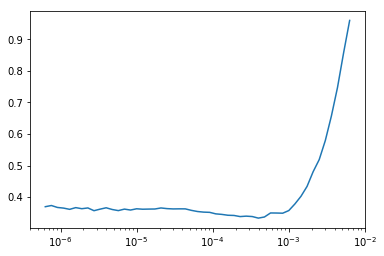

In [21]:
learn.recorder.plot()


In [28]:
learn.save('stage-1-50')

In [29]:
learn.load('stage-1-50')

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

Total time: 01:06
epoch  train loss  valid loss  error_rate
1      0.384150    1.148208    0.320000    (00:33)
2      0.346258    1.159038    0.308571    (00:33)



In [30]:
interp = ClassificationInterpretation.from_learner(learn)

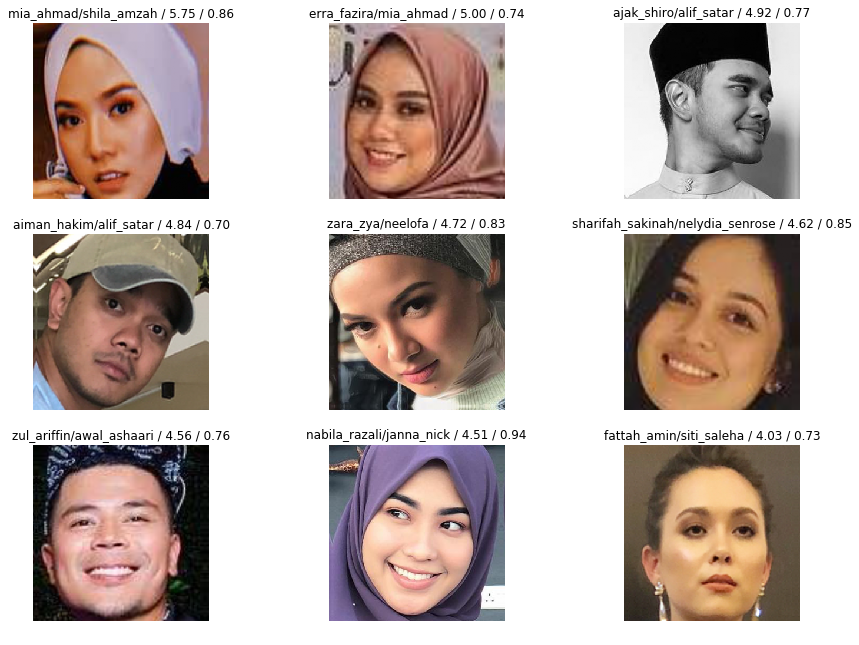

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

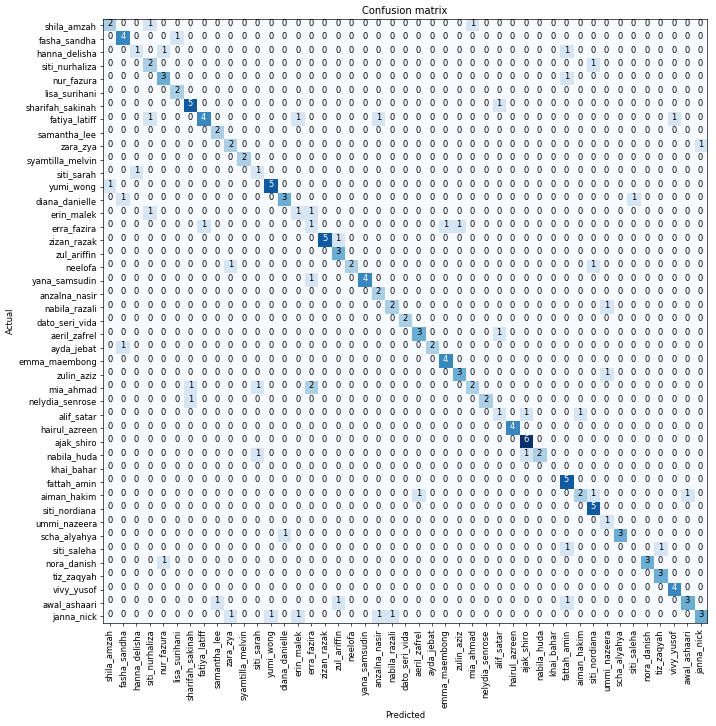

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)



In [34]:
preds = learn.get_preds()

targets = torch.from_numpy(data.valid_ds.ds.y.reshape(-1,1))



0.8171428571428572

In [39]:
topk_accuracy(preds,targets,3)

0.8171428571428572